# Social Web Project | Group 2
## Analysis of Gender-Based Hate Speech Towards Female Dutch Politicians in the Most Recent Dutch General Election
### by Moriah Owens, Christina Benopoulou, Tzortzina Gianni, and Isabelle Huguetto

Install Mastodon. If this doesn't work, try !pip3 instead of !pip.

In [1]:
!pip install mastodon.py


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Establish connection to Mastodon below.
You will need to add your own client_id, client_secret, and access_token in order to run Mastodon requests.

In [2]:
from mastodon import Mastodon

API = Mastodon(
    client_id='AlXEFnh5_DcvCymjl5m9ds32jzY1unQ4l7wiHzuebEc', #Client key
    client_secret='hZlaUilk7K8xvTqYEI4YMiBmiWMhh-cooriVcSTjsRM', #Client secret
    access_token='bd8z8yczTMblqVw3gcW2yZXQGrxnUmFWwW_XW2qFpoI', #Your access token
    api_base_url='https://mastodon.social'  
)

me = API.account_verify_credentials()
print(me)
# If connection has been established correctly, your basic profile information will print below.

Account({'id': 115469282164664965, 'username': 'moriahowens', 'acct': 'moriahowens', 'display_name': '', 'discoverable': None, 'group': False, 'locked': False, 'created_at': datetime.datetime(2025, 10, 31, 0, 0, tzinfo=tzutc()), 'following_count': 0, 'followers_count': 0, 'statuses_count': 5, 'note': '', 'url': 'https://mastodon.social/@moriahowens', 'uri': 'https://mastodon.social/ap/users/115469282164664965', 'avatar': 'https://mastodon.social/avatars/original/missing.png', 'header': 'https://mastodon.social/headers/original/missing.png', 'avatar_static': 'https://mastodon.social/avatars/original/missing.png', 'header_static': 'https://mastodon.social/headers/original/missing.png', 'moved': None, 'suspended': None, 'limited': None, 'bot': False, 'fields': [], 'emojis': [], 'last_status_at': datetime.datetime(2025, 10, 31, 0, 0), 'noindex': False, 'roles': [], 'role': Role({'id': '-99', 'name': '', 'permissions': '65536', 'color': '', 'highlighted': False}), 'source': CredentialAccoun

The following cell exists solely for Jupyter Notebook debugging. I can run this cell to determine if the Kernel needs to be restarted.

In [3]:
1+1

2

This block gets all toots on Mastodon that contain the phrase "Dutch election" (or related phases/hashtags) and were created in 2025. It stores the text content of these toots in a list called "toots".

In [10]:
query = "Dutch election"
toots = []
max_toots = 1000

# Page 1
results = API.search_v2(query)
statuses = results.get("statuses", [])

for s in statuses:
    content = s.get("content", "")
    timestamp = s.get("created_at")

    if timestamp:
        text = content.lower()
        match_phrase1 = "dutch election" in text
        match_phrase2 = "netherlands election" in text
        match_phrase3 = "election in the netherlands" in text
        match_phrase4 = "election in netherlands" in text
        match_phrase5 = "dutch general election" in text
        match_phrase6 = "netherlands general election" in text
        match_hashtag1 = "#dutchelection" in text
        match_hashtag2 = "#netherlandselection" in text
    
    if (match_phrase1 or match_phrase2 or match_phrase3 or match_phrase4 or match_phrase5 or match_phrase6 or match_hashtag1 or match_hashtag2) and timestamp.year == 2025:
        toots.append(content)

print("First page returned", len(statuses), "statuses")

# Next Page(s) if they exist
# search_v2 returns something like results["statuses"][...]["id"]
while len(toots) < max_toots and len(statuses) > 0:
    print("Next page returned", len(statuses), "statuses")
    last_id = statuses[-1]["id"]

    results = API.search_v2(query, max_id=last_id)
    statuses = results.get("statuses", [])

    if not statuses:
        break

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        
        if timestamp:
            text = content.lower()
            match_phrase1 = "dutch election" in text
            match_phrase2 = "netherlands election" in text
            match_phrase3 = "election in the netherlands" in text
            match_phrase4 = "election in netherlands" in text
            match_phrase5 = "dutch general election" in text
            match_phrase6 = "netherlands general election" in text
            match_hashtag1 = "#dutchelection" in text
            match_hashtag2 = "#netherlandselection" in text
    
        if (match_phrase1 or match_phrase2 or match_phrase3 or match_phrase4 or match_phrase5 or match_phrase6 or match_hashtag1 or match_hashtag2) and timestamp.year == 2025:
            toots.append(content)


    if timestamp.year < 2025:
        break

        """
        if len(toots) >= max_toots:
            break
        """
for i, t in enumerate(toots[:20]):
    print(t)

First page returned 18 statuses
Next page returned 18 statuses
Next page returned 19 statuses
Next page returned 20 statuses
Next page returned 15 statuses
Next page returned 13 statuses
Next page returned 17 statuses
Next page returned 18 statuses
Next page returned 19 statuses
Next page returned 16 statuses
Next page returned 17 statuses
Next page returned 19 statuses
Next page returned 18 statuses
Next page returned 17 statuses
Next page returned 18 statuses
Next page returned 20 statuses
Next page returned 20 statuses
Next page returned 18 statuses
Next page returned 20 statuses
Next page returned 18 statuses
Next page returned 17 statuses
Next page returned 20 statuses
Next page returned 17 statuses
Next page returned 18 statuses
Next page returned 14 statuses
Next page returned 17 statuses
Next page returned 17 statuses
Next page returned 15 statuses
Next page returned 15 statuses
Next page returned 16 statuses
Next page returned 16 statuses
Next page returned 18 statuses
Next pa

In [11]:
# This is how many toots have been created in 2025 in English about the Dutch general election.
print(len(toots))

272


This block does the same, but for toots in Dutch, storing them in the list "dutchtoots"

In [7]:
dutchquery = "nederlandse verkiezingen"
dutchtoots = []
max_toots = 1000

# Page 1
dutchresults = API.search_v2(dutchquery)
dutchstatuses = dutchresults.get("statuses", [])

for s in dutchstatuses:
    content = s.get("content", "")
    timestamp = s.get("created_at")

    if timestamp:
        text = content.lower()
        match_phrase7 = "nederlandse verkiezingen" in text
        match_phrase8 = "nederlandse algemene verkiezingen" in text
        match_phrase9 = "verkiezingen in Nederland" in text
        match_hashtag3 = "#nederlandseverkiezingen" in text
        match_hashtag4 = "#nederlandsealgemeneverkiezingen" in text

    
    if (match_phrase7 or match_phrase8 or match_phrase9 or match_hashtag3 or match_hashtag4) and timestamp.year == 2025:
        dutchtoots.append(content)

print("First page returned", len(dutchstatuses), "statuses")

# Next Page(s) if they exist
# search_v2 returns something like results["statuses"][...]["id"]
while len(dutchtoots) < max_toots and len(dutchstatuses) > 0:
    print("Next page returned", len(dutchstatuses), "statuses")
    last_id = dutchstatuses[-1]["id"]

    dutchresults = API.search_v2(dutchquery, max_id=last_id)
    dutchstatuses = dutchresults.get("statuses", [])

    if not dutchstatuses:
        break

    for s in dutchstatuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        
        if timestamp:
            text = content.lower()
            match_phrase7 = "nederlandse verkiezingen" in text
            match_phrase8 = "nederlandse algemene verkiezingen" in text
            match_phrase9 = "verkiezingen in Nederland" in text
            match_hashtag3 = "#nederlandseverkiezingen" in text
            match_hashtag4 = "#nederlandsealgemeneverkiezingen" in text
    
        if (match_phrase7 or match_phrase8 or match_phrase9 or match_hashtag3 or match_hashtag4) and timestamp.year == 2025:
            dutchtoots.append(content)


    if timestamp.year < 2025:
        break

        """
        if len(toots) >= max_toots:
            break
        """
for i, t in enumerate(dutchtoots[:20]):
    print(t)

First page returned 19 statuses
Next page returned 19 statuses
Next page returned 19 statuses
Next page returned 20 statuses
Next page returned 20 statuses
Next page returned 20 statuses
<p>Russische framing van de Nederlandse verkiezingen: geopolitiek, delegitimatie en mediaspektakel,</p><p>Hoe Russische media onze verkiezingen ombuigen tot een spiegel van Moskou’s eigen wereldbeeld.</p><p><a href="https://www.web-watch.org/news/russische-framing-nederlandse-verkiezingen" rel="nofollow noopener" translate="no" target="_blank"><span class="invisible">https://www.</span><span class="ellipsis">web-watch.org/news/russische-f</span><span class="invisible">raming-nederlandse-verkiezingen</span></a> <a href="https://mastodon.nl/tags/NLpol" class="mention hashtag" rel="nofollow noopener" target="_blank">#<span>NLpol</span></a> <a href="https://mastodon.nl/tags/TK2025" class="mention hashtag" rel="nofollow noopener" target="_blank">#<span>TK2025</span></a> <a href="https://mastodon.nl/tags/ver

In [9]:
# This is how many toots have been created in 2025 in Dutch about the Dutch general election.
print(len(dutchtoots))

14


This block filters the toots we gathered, picking out the toots that reference one of the 64 House of Representatives members that are female.

In [19]:
totalelectiontoots = toots + dutchtoots

# List of the last names of all female politicians in the House of Representatives
# First name is included where there are multiple politicians with the same last name
# This will be used to gather instances of references to these politicians
female_politicians = ["Abdi", "van Ark", "Armut", "Becker", "Beckerman", "Belhirch", "van Berkel", "Biekman", "Bikker", "Boelsma-Hoekstra", "van Brenk", "Bromet", "Buhler", "Coenradie", "Heera Dijk", "Inge van Dijk", "Dobbe", "van Eijk", "El Boujdaini", "den Hollander", "ten Hove", "Huizenga", "Kathmann", "Keijzer", "Kostic", "Kroger", "Lahlah", "Lammers", "Maeijer", "Martens-America", "van Meetelen", "Michon-Derkzen", "Moinat", "Moorman", "Mutluer", "Oosterhout", "Oualhadj", "Ouwehand", "Patijn", "Paulusma", "Piri", "van der Plas", "Podt", "Raijer", "Rajkowski", "Rooderkerk", "Schilder", "Steen", "Straatman", "Synhaeve", "Teunissen", "Tijmstra", "Tseggai", "Vellinga-Beemsterboer", "Vliegenthart", "Vondeling", "de Vos", "Wendel", "van der Werf", "Westerveld", "Wiersma", "Yesilgoz-Zegerius", "Zalinyan", "Zwinkels"]

electiontootsaboutwomen = []

for t in totalelectiontoots:
    # Does the toot contain a reference to a female politician?
    fem_ref = 0
    for f in female_politicians:
        if f in t:
            fem_ref = 1
    if fem_ref == 1:
        electiontootsaboutwomen.append(t)

print(len(electiontootsaboutwomen))

['<p>Trending in <a href="https://toot.community/tags/TheNetherlands" class="mention hashtag" rel="nofollow noopener" target="_blank">#<span>TheNetherlands</span></a> on Oct 30, 2025</p><p>Rob Jetten<br>2025 Dutch general election<br>Nicolás Keenan<br>Lidewij de Vos</p><p>Discover more on <a href="https://trendingon.wiki/en/trends/thenetherlands/2025-10-30" rel="nofollow noopener" translate="no" target="_blank"><span class="invisible">https://</span><span class="ellipsis">trendingon.wiki/en/trends/then</span><span class="invisible">etherlands/2025-10-30</span></a></p>', '<p>New paper:</p><p>‘Issue ownership in the online campaign for Dutch general elections: A topic modeling approach.’</p><p>By Joren Vrancken, Tom Dobber, and me. </p><p>Journal of Digital Social Research, open access.</p><p><a href="https://publicera.kb.se/jdsr/article/view/54885" rel="nofollow noopener" translate="no" target="_blank"><span class="invisible">https://</span><span class="ellipsis">publicera.kb.se/jdsr/ar

There are only 2 toots that reference Dutch female politicians in the toots that we gathered. 

This is an indication that either:
1. There is simply not enough data available on Mastodon
2. Our method of data collection is too narrowing, and we need to go about it a different way

We can continue by attempting to search for toots by the name of the politician first, since any toots that reference the first and last name of any of these politicians (in the year 2025) are extremely likely to be talking about Dutch elections.

In [4]:
female_pol_firstlast = ["Fatihya Abdi", "Elles van Ark", "Etkin Armut", "Bente Becker", "Sandra Beckerman", "Fatimazhra Belhirch", "Nathalie van Berkel", "Anouschka Biekman", "Mirjam Bikker", "Lucienne Boelsma-Hoekstra", "Corrie van Brenk", "Laura Bromet", "Judith Buhler", "Ingrid Coenradie", "Heera Dijk", "Inge van Dijk", "Sarah Dobbe", "Wendy van Eijk", "Sarah El Boujdaini", "Renate den Hollander", "Tamara ten Hove", "Renilde Huizenga", "Barbara Kathmann", "Mona Keijzer", "Ines Kostic", "Suzanne Kroger", "Esmah Lahlah", "Annelotte Lammers", "Vicky Maeijer", "Claire Martens-America", "Rachel van Meetelen", "Ingrid Michon-Derkzen", "Nicole Moinat", "Marjolein Moorman", "Songul Mutluer", "Annabel Nanninga", "Sjoukje van Oosterhout", "Ouafa Oualhadj", "Esther Ouwehand", "Mariette Patijn", "Wieke Paulusma", "Kati Piri", "Caroline van der Plas", "Anne-Marijke Podt", "Annette Raijer", "Queeny Rajkowski", "Ilana Rooderkerk", "Shanna Schilder", "Hanneke Steen", "Jeltje Straatman", "Marijke Synhaeve", "Christine Teunissen", "Eveline Tijmstra", "Mikal Tseggai", "Marieke Vellinga-Beemsterboer", "Lisa Vliegenthart", "Marina Vondeling", "Lidewij de Vos", "Hilde Wendel", "Hanneke van der Werf", "Lisa Westerveld", "Femke Wiersma", "Dilan Yesilgoz-Zegerius", "Ani Zalinyan", "Jantine Zwinkels"]
print(len(female_pol_firstlast))

65


In [26]:
name_toots = []

# Page 1
for name in female_pol_firstlast:
    print("Searching for ", name)
    results = API.search_v2(name)
    statuses = results.get("statuses", [])

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        if timestamp.year == 2025:
            name_toots.append({
                "text": content,
                "politician": name,
                "hate_speech": False,
                "hate_categories": []
            })


    print("First page returned", len(statuses), "statuses")

    # Next Page(s) if they exist
    # search_v2 returns something like results["statuses"][...]["id"]
    prev_last_id = None
    while len(statuses) > 0:
        print("Next page returned", len(statuses), "statuses")

        last_id = int(statuses[-1]["id"])
        if last_id == prev_last_id:
            print("Pagination stuck, breaking.")
            break
        prev_last_id = last_id

        results = API.search_v2(name, max_id=str(last_id - 1))
        statuses = results.get("statuses", [])

        if not statuses:
            break

        for s in statuses:
            content = s.get("content", "")
            timestamp = s.get("created_at")
            if timestamp.year == 2025:
                name_toots.append({
                    "text": content,
                    "politician": name,
                    "hate_speech": False,
                    "hate_categories": []
                })


        if timestamp.year < 2025:
            break

Searching for  Fatihya Abdi
First page returned 4 statuses
Next page returned 4 statuses
Searching for  Elles van Ark
First page returned 3 statuses
Next page returned 3 statuses
Searching for  Etkin Armut
First page returned 1 statuses
Next page returned 1 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Bente Becker
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Sandra Beckerman
First page returned 19 statuses
Next page returned 19 statuses
Searching for  Fatimazhra Belhirch
First page returned 2 statuses
Next page returned 2 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Nathalie van Berkel
First page returned 6 statuses
Next page returned 6 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Anouschka Biekman
First page returned 0 statuses
Searching for  Mirjam Bikker
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Lucienne B

Since we now have enough toots, we can analyze them for hate speech. The following code is adapted from the Bluesky file.

In [27]:
import re

In [28]:
hate_keywords = {
    'sexist': [
        # English
        'bitch', 'slut', 'whore', 'feminazi', 'should be home', 'kitchen', 
        'belong in kitchen', 'stay home', 'not fit for', 'too emotional',
        'hormonal', 'on her period', 'typical woman', 'like all women',
        'gold digger', 'sleeping her way', 'token woman', 'diversity hire',
        # Dutch
        'hoer', 'slet', 'teef', 'wijf', 'kutwijf', 'trut', 'tuthola',
        'blijf thuis', 'thuishoren', 'keuken', 'niet geschikt',
        'typisch vrouw', 'als alle vrouwen', 'emancipatiehoer'
    ],
    
    'appearance': [
        # English
        'ugly', 'fat', 'old', 'haggard', 'looks like', 'hideous', 'disgusting',
        'needs makeup', 'aging', 'wrinkled', 'unattractive', 'gross', 'obese',
        'pig', 'cow', 'dog', 'horse face', 'too old', 'past her prime',
        'should dress better', 'unfuckable', 'butter face',
        # Dutch
        'lelijk', 'dik', 'oud', 'afgetakeld', 'ziet eruit als', 'goor',
        'walgelijk', 'smerig', 'varken', 'koe', 'hond', 'te oud', 
        'ouwe taart', 'opgespoten', 'plastisch'
    ],
    
    'threats': [
        # English
        'kill', 'rape', 'assault', 'death threat', 'should die', 'hope you die',
        'deserve to die', 'hang', 'shoot', 'stab', 'murder', 'assassinate',
        'violence', 'hurt', 'beat', 'attack', 'lynch', 'burn',
        'going to get', 'coming for you', 'watch your back', 'better watch out',
        # Dutch
        'dood', 'verkracht', 'vermoord', 'doodgeschoten', 'opgehangen',
        'gestoken', 'aanval', 'geweld', 'pijn doen', 'slaan', 'pak op je',
        'krijg je', 'komt ervan', 'kijk maar uit', 'pas maar op'
    ],
    
    'misogyny': [
        # English
        'stupid woman', 'dumb female', 'emotional', 'hysterical', 'irrational',
        'cant think', 'no brain', 'empty head', 'airhead', 'bimbo', 'ditzy',
        'woman logic', 'female brain', 'overly sensitive', 'dramatic',
        'attention seeker', 'attention whore', 'playing victim', 'victim card',
        'women are', 'females are', 'all women', 'typical female',
        # Dutch
        'domme vrouw', 'stomme wijf', 'emotioneel', 'hysterisch', 'irrationeel',
        'geen hersens', 'leeg hoofd', 'dom blondje', 'vrouwenlogica',
        'typisch vrouwelijk', 'aandachtshoer', 'slachtoffer spelen',
        'vrouwen zijn', 'alle vrouwen', 'wijven zijn'
    ],
    
    'objectification': [
        # English
        'hot', 'sexy', 'body', 'breasts', 'legs', 'ass', 'boobs', 'tits',
        'would bang', 'would smash', 'milf', 'piece of ass', 'nice rack',
        'fuckable', 'bangable', 'doable', 'eye candy', 'arm candy',
        'prostitute', 'escort', 'stripper', 'pornstar',
        # Dutch
        'lekker', 'geil', 'lichaam', 'borsten', 'tieten', 'kont', 'benen',
        'neuken', 'pikken', 'pijpen', 'hoer', 'prostituee', 'slet',
        'hoerig', 'sletterig', 'goedkoop'
    ],
    
    'competence_undermining': [
        # English
        'unqualified', 'incompetent', 'clueless', 'has no idea', 'doesnt know',
        'out of her depth', 'in over her head', 'puppet', 'controlled by',
        'token', 'quota', 'affirmative action', 'only there because',
        'diversity', 'check box', 'not earned', 'handed to her',
        # Dutch
        'onbekwaam', 'incompetent', 'geen idee', 'weet niet', 'snapt niet',
        'marionet', 'pop', 'aangestuurd door', 'quotum', 'alleen maar omdat',
        'diversiteit', 'niet verdiend', 'cadeau gekregen'
    ],
    
    'dismissive': [
        # English
        'shut up', 'nobody cares', 'who cares', 'go away', 'disappear',
        'resign', 'step down', 'quit', 'get out', 'fuck off', 'piss off',
        'go back to', 'return to', 'not welcome', 'dont belong',
        # Dutch
        'kop dicht', 'hou je bek', 'bek houden', 'niemand interesseert',
        'boeit niet', 'rot op', 'oprotten', 'wegwezen', 'ga weg',
        'opzouten', 'opdonderen', 'aftreden', 'opstappen', 'ga terug naar',
        'niet welkom', 'hoort hier niet'
    ],
    
    'ethnic_religious_slurs': [
        # English (relevant to Dutch political context)
        'muslim', 'immigrant', 'foreign', 'terrorist', 'go back', 'not dutch',
        'invasion', 'replacement', 'traitor', 'islam lover', 'multiculti',
        # Dutch
        'moslim', 'allochtoon', 'buitenlander', 'terrorist', 'ga terug',
        'niet nederlands', 'invasie', 'vervanging', 'landverraad', 'verrader',
        'islamliefhebber', 'gutmensch', 'linkse rat'
    ]
}
for post in name_toots:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []

    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(name_toots)
hate_count = len([p for p in name_toots if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in name_toots if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")


Total posts: 1371
Posts with potential hate speech: 107 (7.8%)

Breakdown by category:
  - sexist: 8
  - appearance: 30
  - threats: 45
  - misogyny: 4
  - objectification: 17
  - competence_undermining: 7
  - dismissive: 6
  - ethnic_religious_slurs: 6


Next, we will do the same process with the male politicians, so that we can compare results.

In [29]:
male_pols = ["Thierry Aartsen", "Ismail el Abassi", "Robert van Asten", "Stephan van Baarle", "Mpanzu Bamenga", "Thierry Baudet", "Daniel van den Berg", "Harry Bevers", "Henri Botenbal", "Diederik Boomsma", "Maikel Boon", "Martin Bosma", "Derk Boswijk", "Ruben Brekelmans", "Tijs van den Brink", "Bart van den Brink", "Eric van der Burg", "Julian Bushoff", "Thom van Campen", "Don Ceder", "Simon Ceulemans", "Rene Claassen", "Ranjith Clemminck", "Laurens Dassen", "Ralk Dekker", "Tony van Dijck", "Jimmy Dijk", "Emiel van Dijk", "Diederik van Dijk", "Peter van Duijvenvoorde", "Joost Eerdmans", "Ulysse Ellian", "Dogukan Ergin", "Silvio Erkens", "Marjolein Faber", "Andre Flach", "Maarten Goudzwaard", "Dion Graus", "Pieter Grinwis", "Peter de Groot", "Sarath Hamstra", "Eelco Heinen", "Hidde Heutink", "Michiel Hoogeveen", "Habtamu de Hoop", "Pepijn van Houwelingen", "Dion Huidekooper", "Frederik Jansen", "Chris Jansen", "Rob Jetten", "Henk Jumelet", "Vincent Karremans", "Arend Kisteman", "Jesse Klaver", "Felix Klos", "Jan Arie Koorevaar", "Alexander Kops", "Daan de Kort", "Ulas Kose", "Harmen Krul", "Maes van Lanschot", "Tom van der Lee", "Gidi Markuszower", "Gideon van Meijeren", "Mohammed Mohandis", "Jeremy Mooiman", "Edgar Mulder", "Stephen Neijenhuis", "Jurgen Nobel", "Henk-Jan Oosterhuis", "Jan Paternotte", "Erwin Prickaertz", "Raymond de Roon", "Jan Schoonis", "Bjorn Schutz", "Joost Sneller", "Chris Stoffer", "Sebastiaan Stoteler", "Jan Struijs", "Luc Stultiens", "Henk Vermeer", "Marc Vervuurt", "Hans Vijlbrief", "Elmar Vlottes", "Geert Wilders"]
print(len(male_pols))

85


In [30]:
malepol_toots = []

# Page 1
for name in male_pols:
    print("Searching for ", name)
    results = API.search_v2(name)
    statuses = results.get("statuses", [])

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        if timestamp.year == 2025:
            malepol_toots.append({
                "text": content,
                "politician": name,
                "hate_speech": False,
                "hate_categories": []
            })


    print("First page returned", len(statuses), "statuses")

    # Next Page(s) if they exist
    # search_v2 returns something like results["statuses"][...]["id"]
    prev_last_id = None
    while len(statuses) > 0:
        print("Next page returned", len(statuses), "statuses")

        last_id = int(statuses[-1]["id"])
        if last_id == prev_last_id:
            print("Pagination stuck, breaking.")
            break
        prev_last_id = last_id

        results = API.search_v2(name, max_id=str(last_id - 1))
        statuses = results.get("statuses", [])

        if not statuses:
            break

        for s in statuses:
            content = s.get("content", "")
            timestamp = s.get("created_at")
            if timestamp.year == 2025:
                malepol_toots.append({
                    "text": content,
                    "politician": name,
                    "hate_speech": False,
                    "hate_categories": []
                })


        if timestamp.year < 2025:
            break

Searching for  Thierry Aartsen
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Ismail el Abassi
First page returned 7 statuses
Next page returned 7 statuses
Searching for  Robert van Asten
First page returned 0 statuses
Searching for  Stephan van Baarle
First page returned 19 statuses
Next page returned 19 statuses
Searching for  Mpanzu Bamenga
First page returned 3 statuses
Next page returned 3 statuses
Searching for  Thierry Baudet
First page returned 19 statuses
Next page returned 19 statuses
Next page returned 16 statuses
Next page returned 20 statuses
Next page returned 14 statuses
Searching for  Daniel van den Berg
First page returned 12 statuses
Next page returned 12 statuses
Searching for  Harry Bevers
First page returned 1 statuses
Next page returned 1 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Henri Botenbal
First page returned 0 statuses
Searching for  Diederik Boomsma
First page returned 20 statuses
Next p

In [31]:
for post in malepol_toots:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(malepol_toots)
hate_count = len([p for p in malepol_toots if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in malepol_toots if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

Total posts: 3939
Posts with potential hate speech: 271 (6.9%)

Breakdown by category:
  - sexist: 9
  - appearance: 70
  - threats: 96
  - misogyny: 3
  - objectification: 30
  - competence_undermining: 36
  - dismissive: 24
  - ethnic_religious_slurs: 27


Geert Wilders, as a very controversial figure, may be skewing the data significantly. Let's perform the same analysis for all the male politicians except Wilders.

In [32]:
minus_wilders = []
for post in malepol_toots:
    if post["politician"] != "Geert Wilders":
        minus_wilders.append(post)

for post in minus_wilders:import matplotlib.pyplot as plt
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(minus_wilders)
hate_count = len([p for p in minus_wilders if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in minus_wilders if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

Total posts: 2286
Posts with potential hate speech: 162 (7.1%)

Breakdown by category:
  - sexist: 8
  - appearance: 44
  - threats: 54
  - misogyny: 2
  - objectification: 17
  - competence_undermining: 25
  - dismissive: 16
  - ethnic_religious_slurs: 8


Set up pandas and get aggregate values.

In [33]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [34]:
import pandas as pd

In [35]:
dataframe = pd.DataFrame(name_toots)

agg = dataframe.groupby("politician").agg(
    total_toots = ("text", "count"),
    hate_toots  = ("hate_speech", "sum")
)

agg["non_hate_toots"] = agg["total_toots"] - agg["hate_toots"]

Create bar chart for female politician, displaying total toots against total toots containing hate speech.

In [37]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/be/b3/09eb0f7796932826ec20c25b517d568627754f6c6462fca19e12c02f2e12/matplotlib-3.10.7-cp312-cp312-macosx_10_13_x86_64.whl.metadata
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/be/45/adfee365d9ea3d853550b2e735f9d66366701c65db7855cd07621732ccfc/contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata
  Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/25/b2

In [38]:
import matplotlib.pyplot as plt

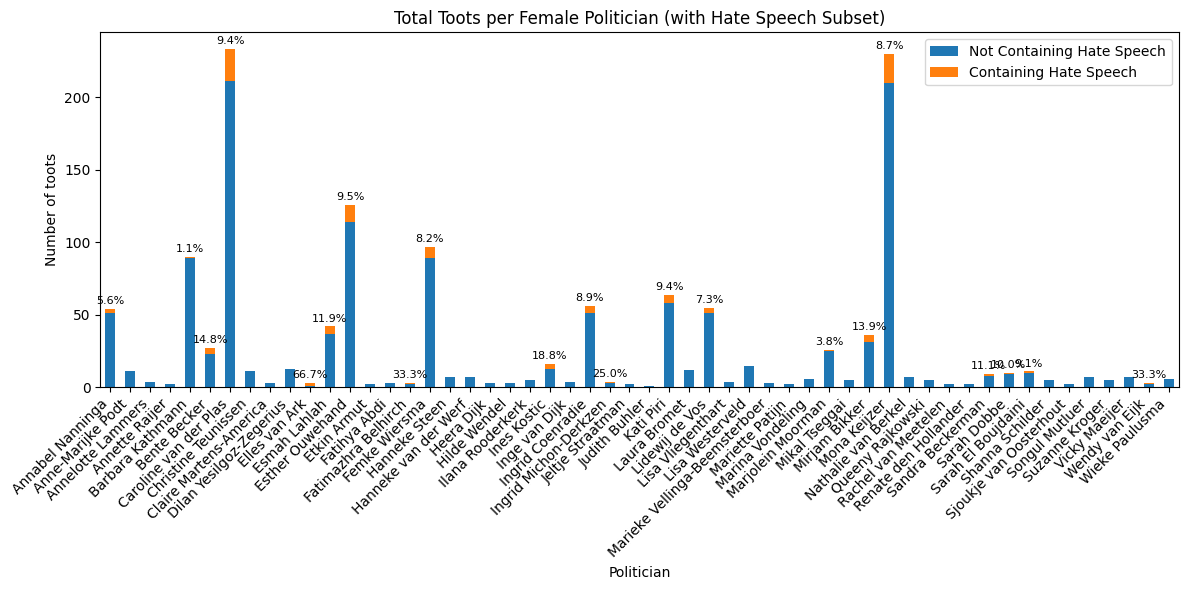

In [43]:
ax = agg[["non_hate_toots", "hate_toots"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg['non_hate_toots'], agg['hate_toots'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=8, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of toots")
ax.set_title("Total Toots per Female Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()
